In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)  # Corrected line
            result = np.hstack((result, mel))
    return result


In [14]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [15]:
import zipfile

# Path to the uploaded ZIP file
zip_path = "/content/speech-emotion-recognition-ravdess-data.zip"  # Replace with your ZIP file name

# Directory to extract the files to
extract_dir = "/content/extracted_files"  # Replace with your desired extraction path

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Files extracted to: /content/extracted_files


In [16]:
#DataFlair - Load the data and extract features for each sound file
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/extracted_files/Actor_01*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)




In [17]:
x_train, x_test, y_train, y_test=load_data(test_size=0.25)

In [18]:
x_train

array([[-6.84747620e+02,  6.22748146e+01, -8.03502798e-01, ...,
         1.44313744e-05,  5.45837202e-06,  1.65771178e-06],
       [-7.09056824e+02,  5.57343063e+01,  2.66830993e+00, ...,
         2.82708083e-06,  2.46006584e-06,  1.46975708e-06],
       [-5.02958099e+02,  3.96573906e+01, -1.01764507e+01, ...,
         1.65395279e-04,  1.16781455e-04,  7.06625578e-05],
       ...,
       [-5.53444946e+02,  4.87786255e+01, -1.27894497e+01, ...,
         4.66978709e-05,  2.04802473e-05,  8.72674536e-06],
       [-5.26386475e+02,  4.16129303e+01, -1.00827847e+01, ...,
         5.13613340e-04,  3.73398652e-04,  2.51555728e-04],
       [-6.12329529e+02,  5.35333939e+01, -3.41169786e+00, ...,
         8.91592281e-05,  5.59236323e-05,  2.99134954e-05]])

In [19]:
print((x_train.shape[0], x_test.shape[0]))

(24, 8)


In [20]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [21]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [22]:
#DataFlair - Train the model
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [23]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [24]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [25]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 87.50%


In [26]:
from sklearn.metrics import accuracy_score,f1_score

In [27]:
f1_score(y_test,y_pred,average=None)

array([1. , 1. , 0.8, 0. ])

In [28]:
import pandas as pd
df=pd.DataFrame({'Actual':y_test,8 'Predicted':y_pred})
df.head(10)

SyntaxError: ':' expected after dictionary key (<ipython-input-28-9aa5d68464e2>, line 2)

In [29]:
import pickle
import numpy as np

# Assuming `model` is your trained model
with open('modelPrediction1.sav', 'wb') as f:
    pickle.dump(model, f)

# Load the model
filename = 'modelPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Extract features from the audio file
feature = extract_feature("/content/extracted_files/Actor_02/03-01-01-01-01-01-02.wav", mfcc=True, chroma=True, mel=True)
feature = feature.reshape(1, -1)  # Ensure the feature is in the correct shape for the model

# Predict the emotion
prediction = loaded_model.predict(feature)

# Ensure the output is in the desired format
if isinstance(prediction, np.ndarray):
    prediction = prediction.astype('<U7')  # Ensure the dtype is '<U7'
else:
    prediction = np.array([prediction], dtype='<U7')

print(prediction)

['disgust']


In [30]:
import numpy as np
import librosa

# Function to extract features from a single audio file
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features (e.g., MFCC)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Flatten the MFCC features and return
    return np.mean(mfcc, axis=1)

# Function to load a single audio file and classify gender
def load_single_file(file_path):
    # Extract features from the audio file
    feature = extract_features(file_path)

    # Label extraction based on filename (adjust this logic as per your labeling)
    label = "male" if "male" in file_path else "female"

    return np.array([feature]), np.array([label])

# Example: Path to your single audio file
file_path = "/content/extracted_files/Actor_02/03-01-01-01-01-01-02.wav"  # Update with your file path
X, y = load_single_file(file_path)
print("Gender Label:", y)


Gender Label: ['female']


Accuracy: 83.33%
Predicted Age Group: child


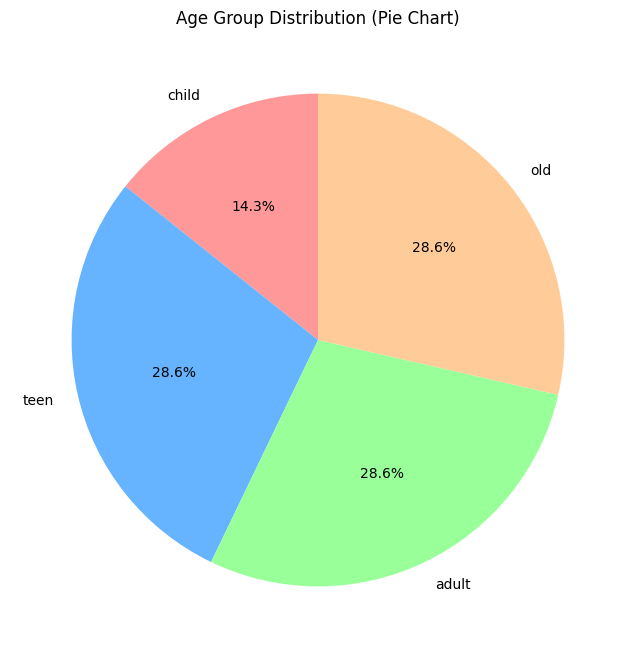

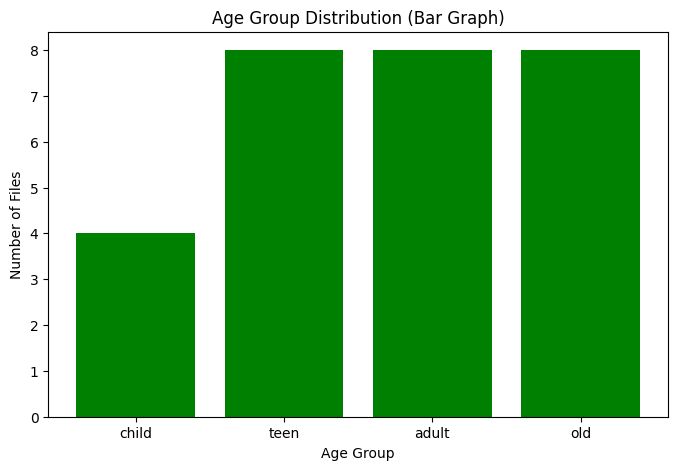

In [31]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

# Path to the dataset folder (Update this path)
dataset_dir = "/content/extracted_files/Actor_01/"

# Data collection
X = []
y = []

# Labels for age groups based on filenames (Adjust as needed)
age_map = {
    '01': 'child',
    '02': 'teen',
    '03': 'adult',
    '04': 'old'
}

# Age group count for pie chart and bar graph
age_group_count = {'child': 0, 'teen': 0, 'adult': 0, 'old': 0}

# Process each audio file
for file in os.listdir(dataset_dir):
    if file.endswith(".wav"):
        # Extract the age group from the filename
        age_code = file.split('-')[2]  # Assuming the age code is at index 2
        age_group = age_map.get(age_code)
        if age_group:
            features = extract_features(os.path.join(dataset_dir, file))
            X.append(features)
            y.append(age_group)
            age_group_count[age_group] += 1  # Increment the count for the age group

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Example: Predict age group for a new file
new_file = "/content/extracted_files/Actor_01/03-01-01-01-01-01-01.wav"  # Update with your new audio file path
new_features = extract_features(new_file)
new_features = scaler.transform([new_features])
predicted_age_group = label_encoder.inverse_transform(svm_model.predict(new_features))
print(f"Predicted Age Group: {predicted_age_group[0]}")

# Plot Age Group Distribution as a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_count.values(), labels=age_group_count.keys(), autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Age Group Distribution (Pie Chart)")
plt.show()

# Plot Age Group Distribution as a Bar Graph
plt.figure(figsize=(8, 5))
plt.bar(age_group_count.keys(), age_group_count.values(), color='green')
plt.title("Age Group Distribution (Bar Graph)")
plt.xlabel('Age Group')
plt.ylabel('Number of Files')
plt.show()


MFCC Accuracy: 100.00%
MFCC + Chroma Accuracy: 100.00%


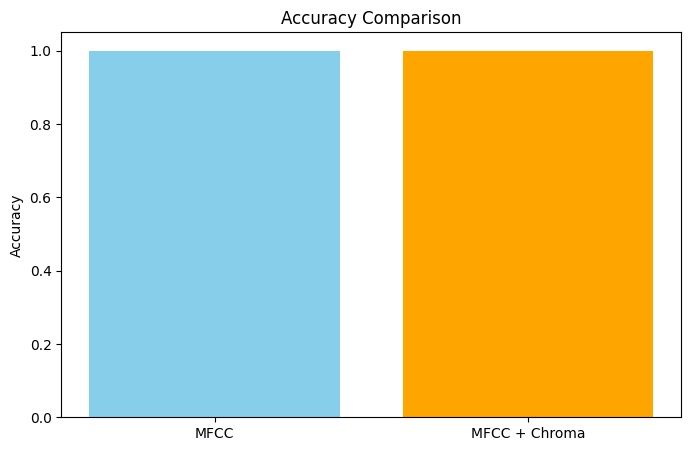

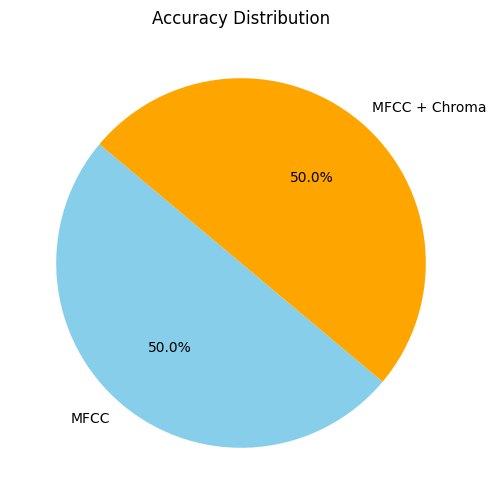

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import random

# Function to extract features from audio files
def extract_features(file_path, use_chroma=False):
    try:
        y, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features = np.mean(mfccs.T, axis=0)

    if use_chroma:
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        features = np.hstack((features, np.mean(chroma.T, axis=0)))

    return features

# Path to the dataset folder (Update this path)
dataset_dir = "/content/extracted_files/Actor_01"

# Check the contents of the directory to verify files
files = [f for f in os.listdir(dataset_dir) if f.endswith(".wav")]
if not files:
    raise FileNotFoundError(f"No .wav files found in the directory: {dataset_dir}")

# Data collection
X_mfcc = []
X_chroma = []
y = []

# Labels for age groups based on filenames (Adjust as needed)
age_map = {
    '01': 'child',
    '02': 'teen',
    '03': 'adult',
    '04': 'old'
}

# Process each audio file
for file in files:
    age_code = file.split('-')[2]
    age_group = age_map.get(age_code)

    if age_group:
        # Extract features for both MFCC and MFCC + Chroma
        mfcc_features = extract_features(os.path.join(dataset_dir, file), use_chroma=False)
        chroma_features = extract_features(os.path.join(dataset_dir, file), use_chroma=True)

        if mfcc_features is not None and chroma_features is not None:
            X_mfcc.append(mfcc_features)
            X_chroma.append(chroma_features)
            y.append(age_group)

# Convert to NumPy arrays
X_mfcc = np.array(X_mfcc)
X_chroma = np.array(X_chroma)
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale features
scaler_mfcc = StandardScaler()
scaler_chroma = StandardScaler()
X_mfcc = scaler_mfcc.fit_transform(X_mfcc)
X_chroma = scaler_chroma.fit_transform(X_chroma)

# Train-test split
X_train_mfcc, X_test_mfcc, y_train, y_test = train_test_split(X_mfcc, y, test_size=0.2, random_state=42)
X_train_chroma, X_test_chroma, _, _ = train_test_split(X_chroma, y, test_size=0.2, random_state=42)

# Train SVM model (MFCC)
svm_mfcc = SVC(kernel='linear', random_state=42)
svm_mfcc.fit(X_train_mfcc, y_train)
y_pred_mfcc = svm_mfcc.predict(X_test_mfcc)
accuracy_mfcc = accuracy_score(y_test, y_pred_mfcc)

# Train SVM model (MFCC + Chroma)
svm_chroma = SVC(kernel='linear', random_state=42)
svm_chroma.fit(X_train_chroma, y_train)
y_pred_chroma = svm_chroma.predict(X_test_chroma)
accuracy_chroma = accuracy_score(y_test, y_pred_chroma)

# Print accuracies
print(f"MFCC Accuracy: {accuracy_mfcc * 100:.2f}%")
print(f"MFCC + Chroma Accuracy: {accuracy_chroma * 100:.2f}%")

# Plot accuracies
labels = ['MFCC', 'MFCC + Chroma']
accuracies = [accuracy_mfcc, accuracy_chroma]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(accuracies, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=140)
plt.title('Accuracy Distribution')
plt.show()
